In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from IPython import display

import os
ROOT_DIR = '.'
import numpy as np
import cPickle

In [8]:
# settings
# log_file = os.path.join(ROOT_DIR, 'cache', 'resnet_adam-0000_resnet_adam-0300_resnet_sgd-0300_barycentric_interpolate.pkl')
log_file = 'cache/resnet_adam-0000_resnet_sgd-0300_resnet_adam-0300_resnet_rmsprop-0300_bilinear_interpolate.pkl'

In [9]:
with open(log_file, 'rb') as fd:
    log = cPickle.load(fd)

alpha_grid = log['alpha_grid']
beta_grid = log['beta_grid']
train_error_grid = log['train_error_grid']
val_error_grid = log['val_error_grid']

In [10]:
print train_error_grid.shape
print val_error_grid.shape

(21, 21)
(21, 21)


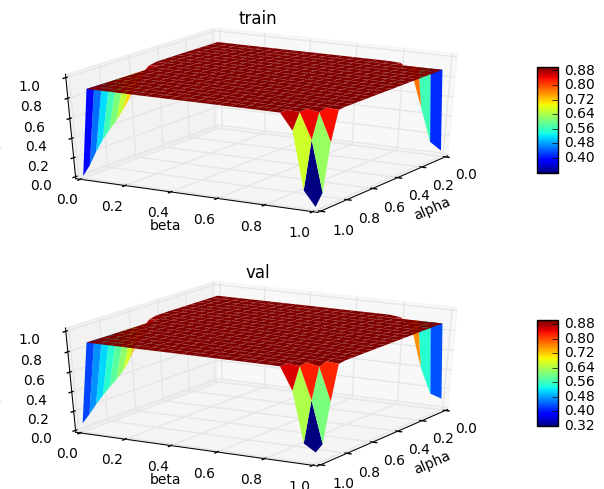

In [18]:
# plt.title('interpolate train error surface')
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(2, 1, 1, projection='3d')
ax.set_title('train')
ax.set_xlabel('alpha')
ax.set_ylabel('beta')
ax.set_zlabel('error')
# fig.suptitle('interpolate train error surface')
surf_train = ax.plot_surface(alpha_grid, beta_grid, train_error_grid, rstride=1, cstride=1, cmap=cm.jet,
                             linewidth=0, antialiased=True)
ax.set_zlim(0, 1.01)
ax.view_init(elev=30., azim=30)
fig.colorbar(surf_train, shrink=0.5, aspect=5)
ax = fig.add_subplot(2, 1, 2, projection='3d')
ax.set_title('val')
ax.set_xlabel('alpha')
ax.set_ylabel('beta')
ax.set_zlabel('error')
surf_val = ax.plot_surface(alpha_grid, beta_grid, val_error_grid, rstride=1, cstride=1, cmap=cm.jet,
                           linewidth=0, antialiased=True)

ax.set_zlim(0, 1.01)
ax.view_init(elev=30., azim=30)
fig.colorbar(surf_val, shrink=0.5, aspect=5)
plt.show()